In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv("Titanic-Dataset.csv")
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
total_lin_col = titanic.shape

In [4]:
null_values = titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Use .describe() to view basic statistics (mean, min, max, etc.).

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#  Check for missing values with .isnull().sum()

In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Replace missing Age values with the mean age (using Numpy).

In [7]:
average_age = titanic["Age"].mean().astype(int)
titanic["Age"] = titanic["Age"].fillna(average_age)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Fill missing Embarked values with the most common port.

In [8]:
most_common_port = titanic['Embarked'].value_counts().index[0]
titanic["Embarked"] = titanic["Embarked"].fillna(most_common_port)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# How many passengers were onboard?

In [9]:
passengers = titanic['Embarked'].value_counts().sum()
print(f"The on board passenger are {passengers}")

The on board passenger are 891


# What is the average Age?

In [10]:
print(f"The average age is {average_age}")

The average age is 29


# What is the average Fare?

In [11]:
avg_fare = titanic['Fare'].mean().astype(int)
print(f"The Fare is {avg_fare}")

The Fare is 32


# How many males and females were there?

In [12]:
male_female = titanic['Sex'].value_counts()
print(f"There were {male_female.values[0]} {male_female.index[0]} and {male_female.values[1]} {male_female.index[1]}")

There were 577 male and 314 female


# How many survived vs. did not survive?

In [13]:
surv_not_surv = titanic['Survived'].value_counts()
print(f"{surv_not_surv.values[0]} died and {surv_not_surv.values[1]} survived")

549 died and 342 survived


# What percentage of passengers survived?

In [14]:
per_of_sur = f"{((surv_not_surv.values[1] / passengers) * 100).astype(int)}%"
print(f"{per_of_sur} passengers survived")

38% passengers survived


# Find survival rates for 1st, 2nd, and 3rd class.

In [15]:
Survival_by_Class  = ((titanic.groupby("Pclass")["Survived"].mean().round(2)) * 100).astype(int)
Survival_by_Class = Survival_by_Class.astype(str) + '%'
Survival_by_Class



Pclass
1    63%
2    47%
3    24%
Name: Survived, dtype: object

# Which class had the highest chance of survival?

In [16]:
print(f"{Survival_by_Class.index[0]} class has the highest chance of survival {Survival_by_Class.values[0]}")

1 class has the highest chance of survival 63%


# Divide passengers into age groups:Compare probabilities across Pclass.

In [17]:
bins = [0,12,19,40,100]
labels = ["Child","Teen","Adult","Senior"]

age_groups = pd.cut(titanic["Age"],bins = bins,labels = labels,right=True)
surv_rate_by_age = titanic.groupby(age_groups)["Survived"].mean().mul(100).round(1).astype(str) + "%"
surv_rate_by_age

C:\Users\Admin\AppData\Local\Temp\ipykernel_15192\2772943415.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_rate_by_age = titanic.groupby(age_groups)["Survived"].mean().mul(100).round(1).astype(str) + "%"


Age
Child     58.0%
Teen      41.1%
Adult     36.0%
Senior    36.7%
Name: Survived, dtype: object

# Bar chart: Number of survivors (0 vs 1).

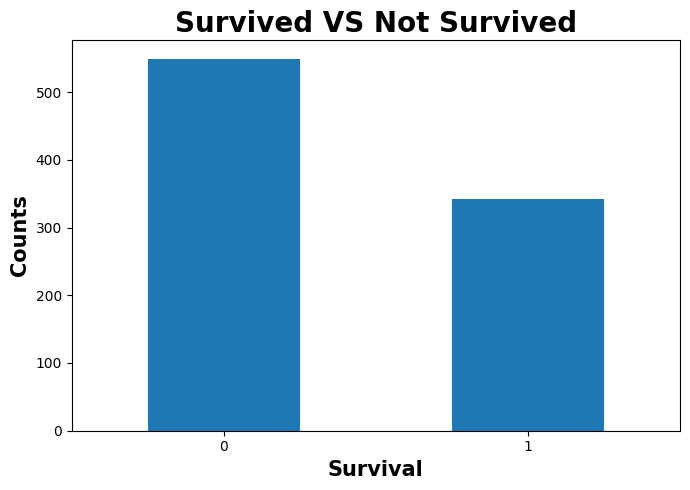

In [18]:
surv_not_surv
plt.figure(figsize=(7,5))
surv_not_surv.plot(kind="bar")
plt.title("Survived VS Not Survived",fontsize = 20,fontweight = "bold")
plt.xlabel("Survival",fontsize = 15,fontweight = "bold")
plt.ylabel("Counts",fontsize = 15,fontweight = "bold")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig("Survival_barplot.png")
plt.show()


# Histogram: Distribution of passenger ages (bins = 20).

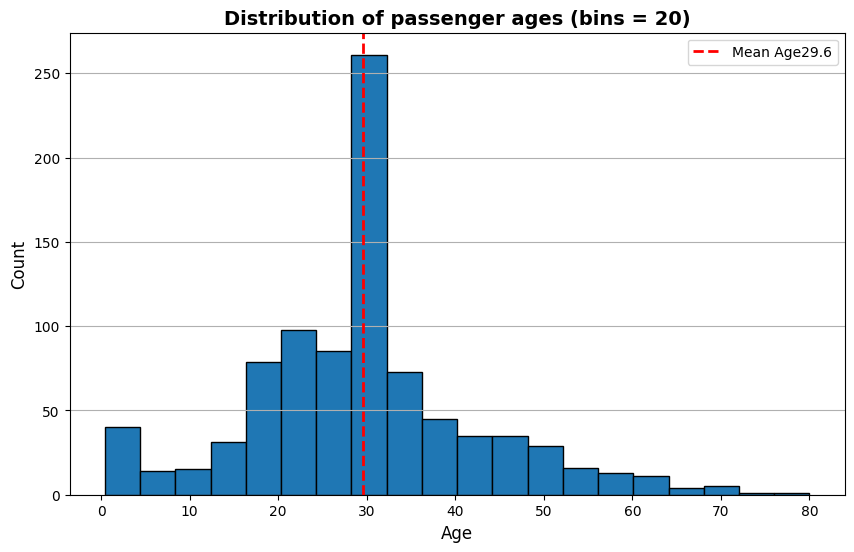

np.float64(29.6)

In [19]:
mean_age = titanic["Age"].mean().round(1)
plt.figure(figsize = (10,6))
plt.hist(titanic["Age"],bins = 20,edgecolor = "black")
plt.title("Distribution of passenger ages (bins = 20)",fontsize = 14,fontweight = "bold")
plt.xlabel("Age",fontsize = 12)
plt.ylabel("Count",fontsize = 12)
plt.axvline(mean_age,color = "red",linestyle = "dashed",linewidth = 2,label = f"Mean Age{mean_age}")
plt.legend()
plt.grid(axis = "y")
plt.tight_layout
plt.savefig("Distribution of passenger ages.png")
plt.show()
mean_age

# Pie chart: Gender distribution.

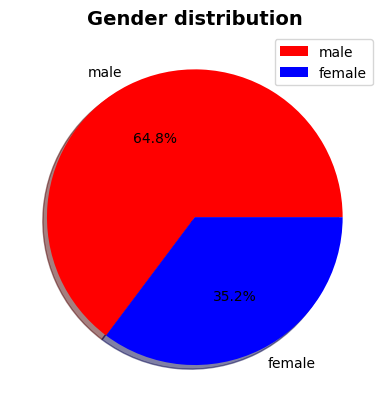

In [20]:
label = male_female.index
slices = male_female.values 
plt.pie(slices,
        labels = label,
        autopct = '%1.1f%%',
        colors = ['red','blue'],
        shadow = True
       )
plt.legend()
plt.title("Gender distribution",fontsize = 14,fontweight = "bold")
plt.savefig("Gender distribution.png")
plt.show()

# Countplot: Survived by Sex (Who survived more?).

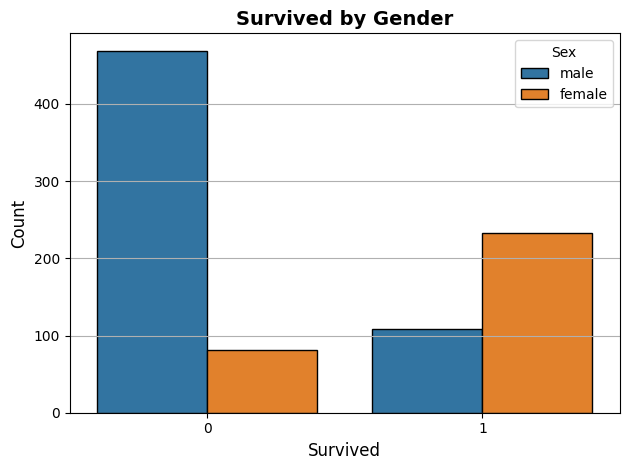

In [21]:
# plt.figure(figsize = (10,6))
sns.countplot(data = titanic,
              x="Survived",
              hue = "Sex",
              edgecolor = "black")
plt.title("Survived by Gender",fontsize = 14,fontweight = "bold")
plt.xlabel("Survived",fontsize = 12)
plt.ylabel("Count",fontsize = 12)
plt.grid(axis = "y")
plt.tight_layout()
plt.savefig("Survived by Gender.png")
plt.show()

# Boxplot: Fare by Pclass (Which class paid more?).

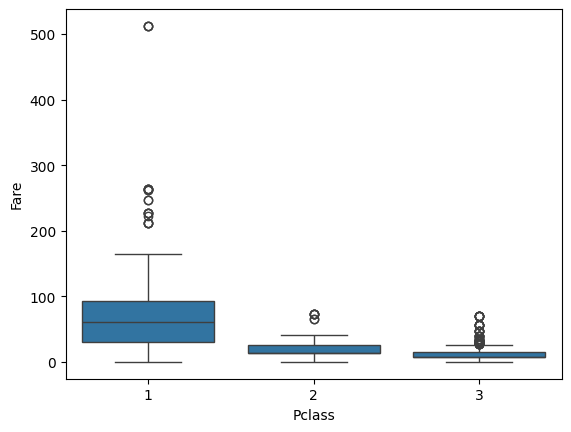

In [22]:
sns.boxplot(data = titanic,
            y = "Fare",
            x = "Pclass",
           )
plt.savefig("Fare by Pclass.png")

# Violinplot: Age by Survived (Age distribution among survivors).

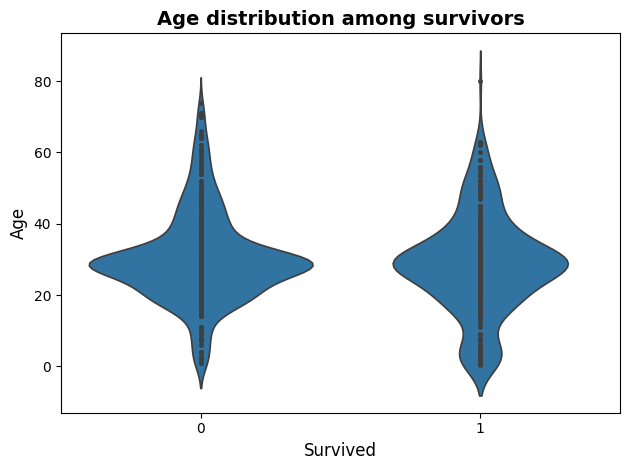

In [23]:
sns.violinplot(data = titanic,
               y = "Age",
               x="Survived",
               
               inner="point",
               # palette = "Set2"
              )

plt.title("Age distribution among survivors",fontsize = 14,fontweight = "bold")
plt.xlabel("Survived",fontsize = 12)
plt.ylabel("Age",fontsize = 12)
# plt.legend(title = "Sex")
plt.tight_layout()
plt.savefig("Age by Survived.png")
plt.show()

# Heatmap: Correlation between numerical columns (Age, Fare, Pclass, Survived).

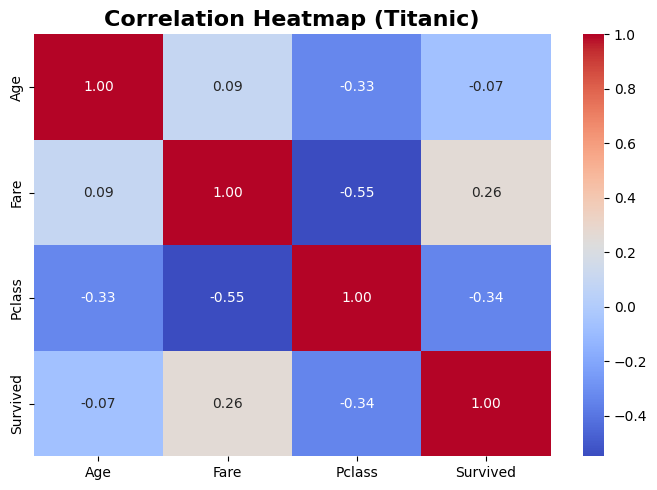

In [24]:
num_col = ["Age", "Fare", "Pclass", "Survived"]
corr = titanic[num_col].corr()
plt.figure(figsize = (7,5))
sns.heatmap(
    corr,
    annot = True,
    cmap = "coolwarm",
    fmt = ".2f"
           )
plt.title("Correlation Heatmap (Titanic)",fontsize = 16,fontweight = "bold")
plt.tight_layout()
plt.savefig("heatmap.png")
plt.show()

# Probability a passenger survived:

In [25]:
passengers
survived = titanic["Survived"].sum()
survived
prob_survived = survived / passengers
prob_survived

np.float64(0.3838383838383838)

# Probability a female survived:

In [26]:
total_female = len(titanic[titanic["Sex"] == "female"])
survived_females = titanic[(titanic["Sex"] == "female") & (titanic["Survived"] == 1)].shape[0]
prob_female_survived = survived_females/total_female
prob_female_survived

0.7420382165605095

# Probability a male survived:

In [27]:
total_male = len(titanic[titanic["Sex"] == "male"])
survived_males = titanic[(titanic["Sex"] == "male") & (titanic["Survived"] == 1)].shape[0]
prob_male_survived = survived_males/total_male
prob_male_survived

0.18890814558058924

# Compare probabilities across Pclass.

In [28]:
prob_by_class_gender = titanic.groupby(["Pclass","Sex"])["Survived"].mean()
prob_by_class_gender

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [29]:
surv_not_surv

Survived
0    549
1    342
Name: count, dtype: int64

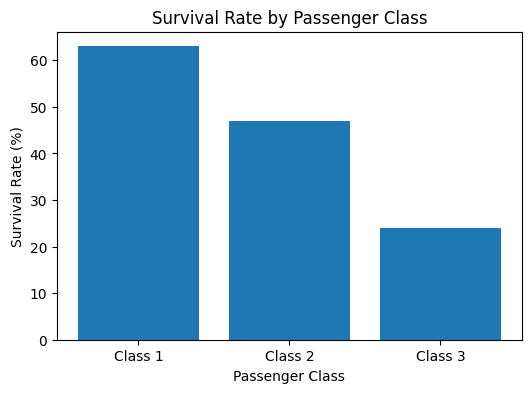

In [30]:
Survival_by_Class = titanic.groupby("Pclass")["Survived"].mean().round(2) * 100
Survival_by_Class = Survival_by_Class.rename(index=lambda x: f"Class {x}")


# Create bar chart
plt.figure(figsize=(6,4))
plt.bar(Survival_by_Class.index.astype(str), Survival_by_Class.values)
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Passenger Class")
plt.savefig("Survival Rate by Passenger Class.png")
plt.show()

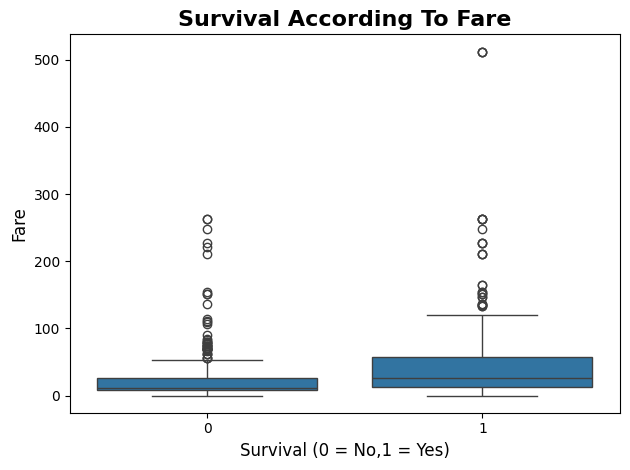

In [43]:
sns.boxplot(data = titanic,
            x = "Survived",
            y = "Fare")

plt.title("Survival According To Fare",fontsize = 16,fontweight = "bold")
plt.xlabel("Survival (0 = No,1 = Yes)",fontsize = 12)
plt.ylabel("Fare",fontsize = 12)
plt.tight_layout()
plt.savefig("Fare VS Survival")
plt.show()